Based on:
- Adapting Virtual Embodiment Through Reinforcement Learning (Prossute et al.)
- Reinforcement Learning with Perturbed Rewards (Wang et al.)

# Imports

In [1]:
import collections
import pandas as pd
import argparse
import time
import numpy as np

In [2]:
import noise_estimator

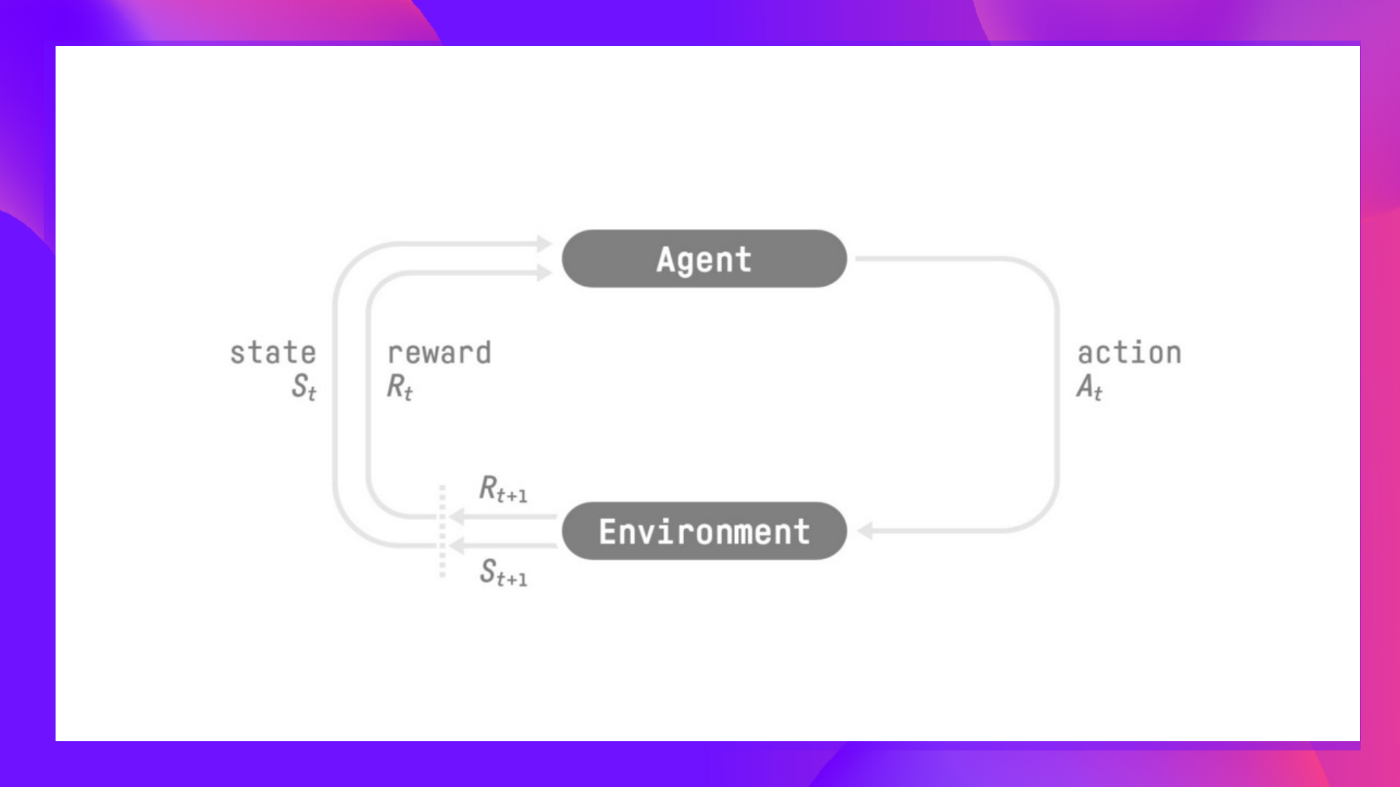

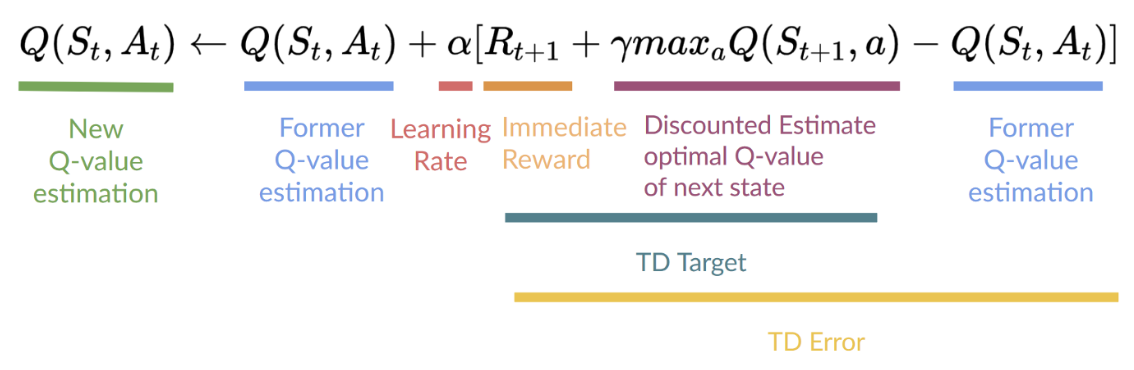

The initial agent and environment implementation had multiple states. We then decided on a stateless setting. At that point, it was easier to create a new `_stateless` wrapper class, which inherits from the multi classes, but sets `num_states=1`

In [3]:
from ucbq_agent_stateless import UCBQAgent
from ucbq_environment_stateless import ModifiedRandomEnvironment

In [4]:
import matplotlib.pyplot as plt
from tqdm import tqdm 
import utils

from modified_pendulum_processor import ModifiedPendulumProcessor

from utils import *

# Params

In [5]:
def default_params():
    """ These are the default parameters used in the framework. """
    return {
            # Runner parameters
            'max_steps': 120,
            'num_episodes': 100,
            'num_actions': 7, 
            'start_action': 0, 
            'correct_action': 1,    # Zero indexed 
            # Optimization parameters
            'alpha': 0.5,
            'alpha_decay': 40,
            'alpha_min': 0.001,
            # Exploration parameters
            'epsilon': 1,
            'epsilon_decay': 20,
            'epsilon_min': 0.01,    
            'gamma': 0.95,
            'plots': False,
            'noise': True,
            'surrogate': False,
            'surrogate_c_interval': 10,
            'surrogate_c_interval_min': 30,
           }

# Noiseless rewards UCB Q-learning

Q-table:
[[-8 -7 -6 -5 -6  0 -5]]
Number of times action was taken:
[[ 3.  4.  2.  6.  5. 34.  2.]]
Total timesteps:
50


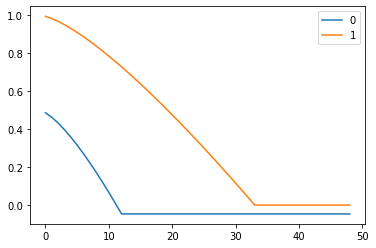

In [6]:
params_new ={
    'noise': False,
    'alpha_decay': 20,
    'epsilon_decay': 40,
    }
params = default_params() | params_new

agent = UCBQAgent(params=params)

q_values_for_chart, rewards, episode_length, selected_action, reward_processor, alphas, epsilons = runner(agent=agent, params=params)
utils.print_agent_stats(agent)
pd.DataFrame([alphas, epsilons]).T.plot()

100%|██████████| 100/100 [00:00<00:00, 1090.93it/s]


Accuracy: 100.0
Mean episode length: 50.0


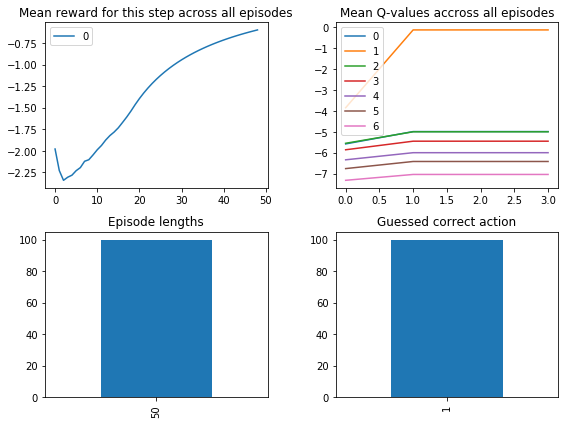

In [7]:
params = default_params()
params['noise'] = False
params['plots'] = True

# The Q-value shape make sense - we're trying higher numbers later
# so they converge to -1 slower than e.g. action 0 or 1
plot_mean_q_values(params=params)

# Noisy rewards
- rewards are now noisy
- q-learner hasn't changed

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

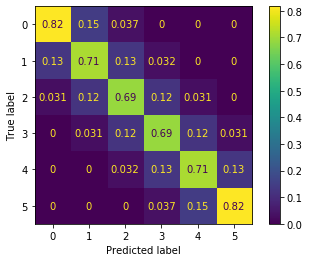

True

In [9]:
params = default_params()
num_actions = params['num_actions']
correct_action = params['correct_action']
params['diag'] = 0.69
# Confusion matrix used as noise
num_unique_rewards = utils.get_num_unique_rewards(num_actions=num_actions, correct_action=correct_action)
cmat = ModifiedPendulumProcessor(num_unique_rewards=num_unique_rewards).initialize_cmat(diag=params['diag'])
ConfusionMatrixDisplay(confusion_matrix=cmat).plot()
plt.show()
noise_estimator.is_invertible(cmat)

100%|██████████| 100/100 [00:00<00:00, 815.40it/s]


Accuracy: 78.0
Mean episode length: 50.0
Last reward processor:
Estimated confusion matrix:


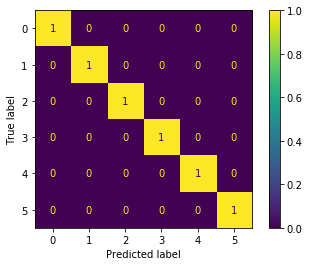

Reward sets:
(0, 1): [0, 0, -1, -1, 0, -1, 0, 0, -1, 0, 0, -2, 0, -1, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0]
(0, 3): [-2, -1, -1, -3, -3]
(0, 5): [-5]
(0, 6): [-5, -4, -5]
Reward set counts:
Key (0, 1): 40 items
Key (0, 3): 5 items
Key (0, 5): 1 items
Key (0, 6): 3 items


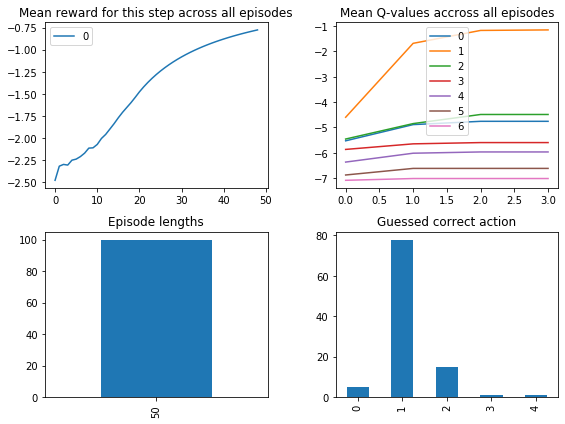

In [10]:
# res = {'target': 95.89999999999999, 'params': {'alpha': 0.8236118040381998, 'alpha_decay': 243.0544785033269, 'alpha_min': 0.5113965695937486, 'epsilon': 0.25289603267158034, 'epsilon_decay': 70.53090930872196, 'epsilon_min': 0.044310479986752194, 'gamma': 0.8871072251030447, 'surrogate_c_interval': 67.76179038423699}}
# params=res['params']
params = default_params()
params['plots'] = True
plot_mean_q_values(params=params)

# Surrogate rewards

100%|██████████| 1/1 [00:00<00:00, 18.03it/s]

Accuracy: 0.0
Mean episode length: 1200.0
Last reward processor:
Estimated confusion matrix:


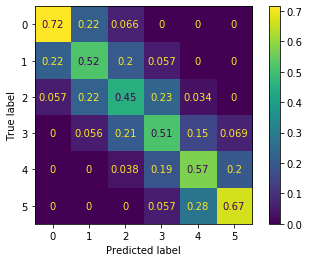

Reward sets:
(0, 0): [0, -1, 0, -2, 0, -1, -1, -1, -2, -2, -2, 0, -2, 0, -3, -2, -2, -1, -2, -2, -2, -1, -1, -2, 0, 0, -2, -1, -2, 0, -1, 0, 0, -1, -1, -1, -1, -1, 0, -2, -1, -1, -1, 0, 0, -1, -1, -2, -1, -2, -2, -2, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -2, -1, -1, -2, 0, 0, -3, -1, -1, -2, 0, -2, -1, 0, 0, -1, -3, -2, -3, -1, -1, -3, -2, -1, -2, -1, 0, 0, -1, -1, -1, -3, -1, 0, -1, 0, -1, -1, 0, -1, 0, 0, -1, 0, 0, -2, 0, -1, 0, -3, -1, -1, -1, -1, -1, -1, -1, 0, -2, -1, -2, 0, -1, -1, 0, 0, -2, -2, 0, 0, -2, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, -1, -1, -2, -1, -1, -1, 0, -1, -1, -1, -1, -2, -1, -2, -2, 0, -2, -1, -1, -1, 0, -1, -3, -1, 0, 0, -1, -1, -1, -1, -1, -1, -3, -1, -2, 0, -3, -3, -1, 0, 0, -2, -1, -1, -2, -2, -1, -2, -2, -1, -1, -2, -2, -1, -1, -1, -3, -1, -3, -1, 0, 0, -1, 0, -1, 0, -3, -1, -2]
(0, 1): [0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, -2, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -2, -1, -1, 0,

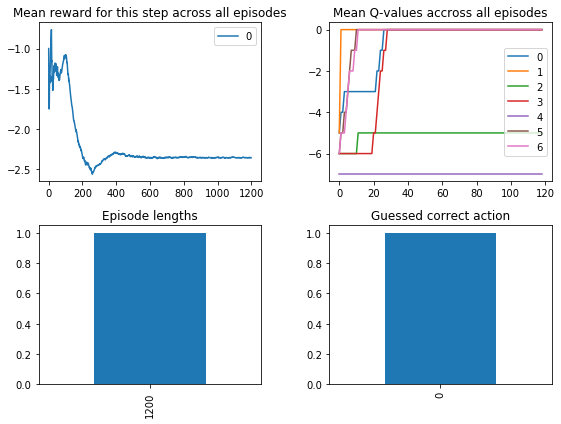

In [11]:
# When we always pick at random, we never end up consistently picking the same action
# so the episode end is never triggered by. 
# Therefore the agent has enough observations to properly estimate the noise matrix
params_new ={
    'max_steps': 1200,
    'num_episodes': 1,
    'noise': True, 
    'surrogate': True, 
    'plots': True, 
    # epsilon min must be high, otherwise we never end up with a convertable matrix
    # and never end up using the surrogate rewards
    'epsilon_min': 0.5,
    'diag': 0.5
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 100/100 [00:00<00:00, 639.33it/s]


Accuracy: 80.0
Mean episode length: 50.0
Last reward processor:
Estimated confusion matrix:


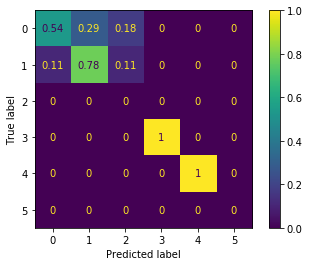

Reward sets:
(0, 0): [-1, 0, -1, -1]
(0, 1): [0, 0, -2, 0, 0, 0, -1, 0, -2, -2, 0, -1, 0, 0, -1, 0, -1, -1, 0, -1, -2, -2, 0, 0, -1, 0, 0, -1, 0, -1, -1, -2, 0, 0, 0, 0, -1]
(0, 2): [-1, -1, -1, -1, -2]
(0, 4): [-3]
(0, 6): [-4, -4]
Reward set counts:
Key (0, 0): 4 items
Key (0, 1): 37 items
Key (0, 2): 5 items
Key (0, 4): 1 items
Key (0, 6): 2 items


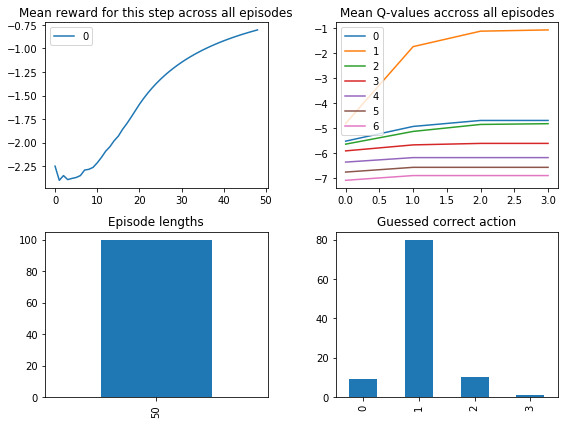

In [12]:
params_new ={
    'max_steps': 120,
    'num_episodes': 100,
    'noise': True, 
    'surrogate': True, 
    'plots': True,
    'diag': 0.5
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 100/100 [00:00<00:00, 589.73it/s]


Accuracy: 71.0
Mean episode length: 50.0
Last reward processor:
Estimated confusion matrix:


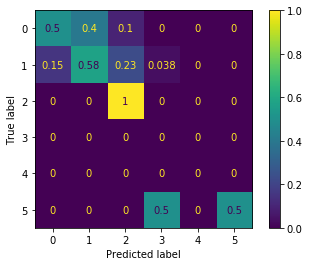

Reward sets:
(0, 0): [0, 0, -1, -1, 0, -1, -2]
(0, 1): [0, -1, 0]
(0, 2): [0, -2, -1, -1, -1, -2, -1, -3, -1, -2, -2, -1, 0, -2, -1, 0, -1, -1, -1, -1, -2, -1, -1, -1, -1, 0, -1, -2, -2, -1, -2, -2, -3, -1, -1]
(0, 3): [-2, -2]
(0, 5): [-5, -3]
Reward set counts:
Key (0, 0): 7 items
Key (0, 1): 3 items
Key (0, 2): 35 items
Key (0, 3): 2 items
Key (0, 5): 2 items


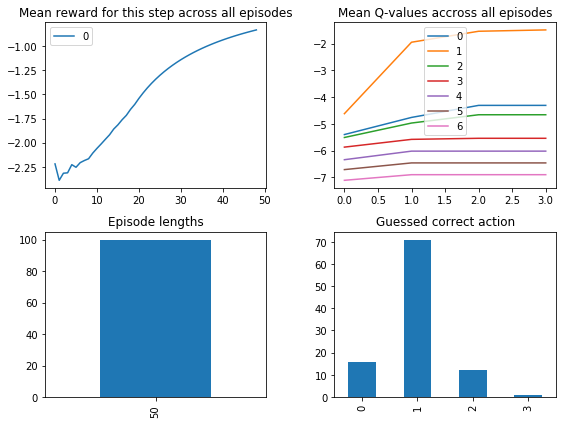

In [13]:
params_new ={
    'noise': True, 
    'surrogate': True, 
    'plots': True, 
    # 'surrogate_c_interval': 10,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

# Sanity check

In [14]:
params = default_params()

print('Accuracy should be higher, timesteps should be lower')

params['noise'] = False
params['surrogate'] = False
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

params['noise'] = True
params['surrogate'] = False
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

params['noise'] = True
params['surrogate'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

Accuracy should be higher, timesteps should be lower


100%|██████████| 100/100 [00:00<00:00, 685.43it/s]


100.0 50.0


100%|██████████| 100/100 [00:00<00:00, 546.12it/s]


72.0 50.0


100%|██████████| 100/100 [00:00<00:00, 460.94it/s]

80.0 50.0
